<a href="https://colab.research.google.com/github/huynguyen789/sentimentAnalysis-Vader/blob/main/Demo_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. SET UP & INSTALLING LIBRARY:


In [ ]:
#Location tagger:
!pip install locationtagger
import locationtagger

# #Newcatcher api
# !pip install newspaper3k
# !pip install newscatcherapi
# from newscatcherapi import NewsCatcherApiClient


#Textblob
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# #Advance final model sentiment:
# !pip install transformers
# from transformers import pipeline
# fin_model= pipeline("sentiment-analysis", model="nickmuchi/deberta-v3-base-finetuned-finance-text-classification", tokenizer="nickmuchi/deberta-v3-base-finetuned-finance-text-classification")

#Vader
!pip install sumy
!pip install gdeltdoc
!pip install vaderSentiment
import nltk
nltk.download('punkt')
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gdeltdoc import GdeltDoc, Filters
from pathlib import Path
from gensim.parsing.preprocessing import remove_stopwords


import nltk
import spacy
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

# Import packages
# Default packages
import time
import csv
import os
import json
# Preinstalled packages
import requests
import pandas


from newspaper import Article
from newspaper import Config
from textblob import TextBlob
import locationtagger
import datetime

from gdeltdoc.filters import near


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.3 MB/s 
     |████████████████████████████████| 10.1 MB 63.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 211 kB 74.2 MB/s 
     |████████████████████████████████| 7.4 MB 57.8 MB/s 
     |████████████████████████████████| 81 kB 11.2 MB/s 
     |████████████████████████████████| 93 kB 2.9 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=e4e657d5f6f938050f5c19e4bd4e0a7594cce5bbbe495e06b349b49efc73e268
  Stored in directory: /root/.cache/pip/wheels/99/74/83/8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=44dd5491e5d11e022e55ba3c5d91b32fe1ef197c796c950a97fb600535d28094
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 14.8 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [ ]:
from datetime import date
from datetime import timedelta

#Get today

date_num = 5

date = date.today() - timedelta(days = date_num)

# Yesterday date
yesterday = date - timedelta(days = 1)

date = str(date)
print("Yesterday was: ", yesterday)
print("Today's date:", date)

Yesterday was:  2022-12-08
Today's date: 2022-12-09


#II. FUNCTIONS

In [ ]:
#CLEAN DATA:
#Function to clean the data:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions
  text = re.sub(r'#', '', text) #Remove "#"
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyper links
  text = remove_stopwords(text) #Remove stopwords (no meaning words)
  return text


#ANALYSIS USING TEXTBLOB:
#Create a function to get the subjectivity:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity



# #Advance sentiment analysis model:
# pandas.options.mode.chained_assignment = None  # default='warn'
# def advance_model(text):
#     return fin_model(text)[0]["label"]

#Function to compute the negative neutral and positive analysis:
def getAnalysis_advance(label):
  if label == 'bearish':
    return 'Negative'
  elif label == 'bullish':
    return 'Positive'
  else:
    return 'Neutral'


#Function to compute the negative neutral and positive analysis:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

#Function to analyze bias level:
def getBiasLevel(score):
  if score ==0:
    return 'Low'
  elif score > 0.6 :
    return 'High'
  else:
    return 'Medium'

#Get locations
def get_country(atext):
  entities = locationtagger.find_locations(text = atext)
  return entities.countries

def get_region(atext):
  entities = locationtagger.find_locations(text = atext)
  return entities.regions

SIA = SentimentIntensityAnalyzer()

#Analyze using Vader:
def vader_score(text):
  vad_score = SIA.polarity_scores(text)
  return vad_score['compound']


# user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
# cfg = Config()
# cfg.browser_user_agent = user_agent

pandas.set_option('display.max_colwidth', None)
pandas.set_option("display.max_columns", 100)
pandas.set_option("display.max_rows", 10)


#III. PULLING DATA

In [ ]:
#Set up pulling data tool
gd = GdeltDoc()


#Create an empty data frame
final_df = pandas.DataFrame(columns = ['title', 'text','seendate','domain', 'sourcecountry', 'textcountries', 'textstates'])


#Set up keyword:
KEY_WORD = 'stock'
nearword = ['chain','issue','news','release','shortage', 'update', 'delay', 'crisis', 'output','input', 'manufacturing', 'production', 'bottleneck','disruption']

#Set up filter:
NUM_RECORDS = 250
TIME_SPAN = "12m"
COUNTRIES = ["US", "UK", "CA"]
START_DATE = "2022-08-01"
END_DATE = date

#Start Search:
for term in nearword:

    f = Filters(
        num_records = NUM_RECORDS,
        # start_date = START_DATE,
        # end_date=END_DATE,
        timespan= TIME_SPAN,
        country = COUNTRIES,
        near=  near(15, KEY_WORD, term)
        )

    articles = gd.article_search(f)


    df_columns = ['title','seendate','domain', 'language', 'sourcecountry', 'textcountries', 'textstates']

    articles = articles.reindex(columns = df_columns)

    LANGUAGE = "english"
    SENTENCES_COUNT = 3

    final_df = pandas.concat([final_df, articles], axis = 0)

#Drop dulicated articles
final_df = final_df.drop_duplicates(subset=['title'])

# convert to datetime & sort from longest to newest
final_df['seendate'] = pd.to_datetime(final_df['seendate'])
final_df['date'] = final_df['seendate'].dt.date
final_df = final_df.sort_values(by='date')
final_df.reset_index(inplace=True, drop=True)
final_df = final_df.drop(columns=['seendate','text','language'])


display(final_df)


,title,domain,sourcecountry,textcountries,textstates,date
0,Spanberger has centered stock - trading ban . Now it may get a vote .,washingtonpost.com,United States,NaN,NaN,2022-09-15
1,Congressional stock trading talks at loggerheads over controversial Supreme Court provision,aol.com,United States,NaN,NaN,2022-09-15
2,"Targeting Russia Senior Officials , Defense Industrial Base , and Human Rights Abusers",state.gov,United States,NaN,NaN,2022-09-15
3,TFSA Investors : 1 Beaten - Up Growth Stock to Buy in Mid - September,fool.ca,Canada,NaN,NaN,2022-09-15
4,2 Stocks That Could Grow Your Portfolio Over the Next Decade,fool.ca,Canada,NaN,NaN,2022-09-15
...,...,...,...,...,...,...
2178,"Malvern Bancorp Rises , First Bank Falls After Merger Deal",marketwatch.com,United States,NaN,NaN,2022-12-14
2179,UK watchdog investigates rise in antibiotics prices amid strep A outbreak,theguardian.com,United Kingdom,NaN,NaN,2022-12-14
2180,China Covid : Panic - buying and shortages as restrictions are eased,bbc.co.uk,United Kingdom,NaN,NaN,2022-12-14
2181,Maladies respiratoires au Québec : mise à jour de la santé publique mercredi,lactualite.com,Canada,NaN,NaN,2022-12-14


#IV. RUN ANALYSIS

In [ ]:
SIA = SentimentIntensityAnalyzer()
#Get subjectivity score by Texblob
final_df['bias_score'] = final_df['title'].apply(getSubjectivity)

#Get sentiment_score by Vader
final_df['sentiment_score'] = final_df['title'].apply(vader_score)

# #Get location
# final_df['mentioned_countries'] = final_df['title'].apply(get_country)
# final_df['mentioned_countries'] = final_df['title'].apply(get_region)

#Get analysis
final_df['sentiment'] = final_df['sentiment_score'].apply(getAnalysis)

final_df['bias_level'] = final_df['bias_score'].apply(getBiasLevel)

#Organize data frame:
final_df = final_df[['date', 'title', 'sentiment', 'bias_level','sentiment_score','bias_score','domain','sourcecountry','textcountries','textstates']]

final_df

display(final_df)



,date,title,sentiment,bias_level,sentiment_score,bias_score,domain,sourcecountry,textcountries,textstates
0,2022-09-15,Spanberger has centered stock - trading ban . Now it may get a vote .,Negative,Low,-0.5574,0.000000,washingtonpost.com,United States,NaN,NaN
1,2022-09-15,Congressional stock trading talks at loggerheads over controversial Supreme Court provision,Positive,High,0.4215,0.950000,aol.com,United States,NaN,NaN
2,2022-09-15,"Targeting Russia Senior Officials , Defense Industrial Base , and Human Rights Abusers",Negative,Medium,-0.4767,0.550000,state.gov,United States,NaN,NaN
3,2022-09-15,TFSA Investors : 1 Beaten - Up Growth Stock to Buy in Mid - September,Negative,Low,-0.0516,0.000000,fool.ca,Canada,NaN,NaN
4,2022-09-15,2 Stocks That Could Grow Your Portfolio Over the Next Decade,Neutral,Low,0.0000,0.000000,fool.ca,Canada,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2178,2022-12-14,"Malvern Bancorp Rises , First Bank Falls After Merger Deal",Neutral,Medium,0.0000,0.333333,marketwatch.com,United States,NaN,NaN
2179,2022-12-14,UK watchdog investigates rise in antibiotics prices amid strep A outbreak,Neutral,Low,0.0000,0.000000,theguardian.com,United Kingdom,NaN,NaN
2180,2022-12-14,China Covid : Panic - buying and shortages as restrictions are eased,Negative,Low,-0.4019,0.000000,bbc.co.uk,United Kingdom,NaN,NaN
2181,2022-12-14,Maladies respiratoires au Québec : mise à jour de la santé publique mercredi,Neutral,Low,0.0000,0.000000,lactualite.com,Canada,NaN,NaN


In [ ]:
# #Export to csv file
# final_df.to_csv('/content/20220804_20221102.csv', encoding='utf-8-sig', index=False)

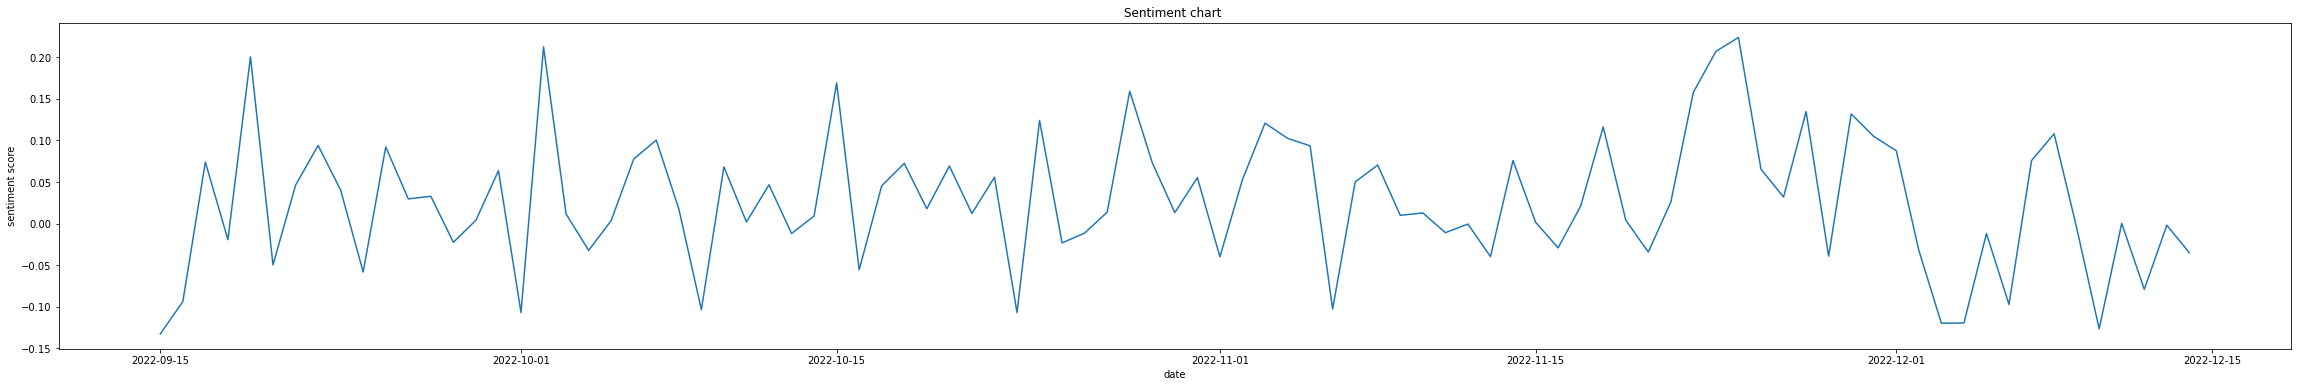

In [ ]:
#Visualize historical chart:
final_df = final_df.groupby(final_df['date']).mean()

plt.figure(figsize=(40,6))
plt.plot( final_df['sentiment_score'])
plt.xlabel("date")
plt.ylabel("sentiment score")
plt.title("Sentiment chart ")
plt.show()

In [ ]:
a = pd.read_csv('semiconductordataset.csv')
# a = a.sort_values(by='date')
a.head()

#Visualize historical chart:
plt.figure(figsize=(40,6))
plt.plot(a.date, a['score'])
plt.xlabel("date")
plt.ylabel("sentiment score")
plt.title("Sentiment chart ")
plt.show()

# # convert to datetime
# a['seendate'] = pd.to_datetime(a['seendate'])
# a['date'] = a['seendate'].dt.date
# a = a.sort_values(by='date')

# a['summary'] = a['text']
# a = a.drop(columns=['seendate','text','url','url','language'])
# a = a.reset_index(drop=True)
# a.head()

In [ ]:
# convert to datetime
a['date'] = pd.to_datetime(a['date'])
a['date'] = a['date'].dt.date
a = a.sort_values(by='date')

# a['sentiment_score'] = a['score']
a.head()

In [ ]:
b = pd.read_csv("semiconductordataset1.csv")
b['date'] = pd.to_datetime(b['date'])
b['date'] = b['date'].dt.date
b = b.sort_values(by='date')

# #Match format with a
# b['score'] = b['sentiment_score']
# b['subjectivity'] = b['bias_score']

display(b)

In [ ]:
c = pd.read_csv("20220804_20221102.csv")
c['date'] = pd.to_datetime(c['date'])
c['date'] = c['date'].dt.date
c = c.sort_values(by='date')

#Match format with a
c['score'] = c['sentiment_score']
c['subjectivity'] = c['bias_score']

display(c)

In [ ]:
#Merge 3 csv files
# b = pd.read_csv("20191005_20200104.csv")


frames = [a,b]

result = pd.concat(frames)
result = result.sort_values(by='date')
result = result.reset_index(drop=True)
display(result)

In [ ]:
#Export to csv file
result.to_csv('/content/nov7.csv', encoding='utf-8-sig', index=False)

#FUTHER TESTING


In [ ]:
# # from datetime import datetime
# # from dateutil.relativedelta import relativedelta

# #save all date into a list
# dateList = []
# for i in range(36):
#   date = datetime.today()- relativedelta(months=i)
#   # print('Today: ',datetime.today().strftime('%Y-%m-%d'))
#   # print('After Month:', date.strftime('%Y-%m-%d'))
#   date = date.strftime('%Y-%m-%d')
#   dateList.append(date)

# # print(dateList)


